In [419]:
import arff
name='training_subsetD.arff'
#name='testingD.arff'
file=open(name)
dataset = arff.load(file)
attributes_list = dataset.get("attributes",[])
data=dataset.get("data")

attribute_vector=[]

#attribute_info is in the form of (ATTRIBUTE NAME,[POSSIBLE Categories under this ATTRIBUTE])
for idx, attribute_info in enumerate(attributes_list):
#print(attribute_info)
    attribute_vector+=[attribute_info[0]]

num_attributes=len(attribute_vector)

print("Last Column is the prediction(Ground Truth), attribute name is= ", attribute_vector[274])
print("Possible Values for this attribute: ",attributes_list[274][1])
print(num_attributes)

#Exploring the 265th data attribute
print(attributes_list[265][0],attributes_list[265][1])

#Exploring the last attribute which is the ground truth class -- True/False
print(attributes_list[274][0],attributes_list[274][1])

Last Column is the prediction(Ground Truth), attribute name is=  Class
Possible Values for this attribute:  ['True', 'False']
275
Session Last Request Hour Of Day ["'(-inf-6.5]'", "'(6.5-10.5]'", "'(10.5-14.5]'", "'(14.5-18.5]'", "'(18.5-inf)'"]
Class ['True', 'False']


In [82]:
name='testingD.arff'
file=open(name)
dataset = arff.load(file)
data2=dataset.get("data")

In [373]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

%matplotlib inline
from matplotlib import pyplot as plt

Converting arff file to csv file named training_set and testing_set

In [84]:
df=pd.DataFrame(data)
col=[int(x) for x in range(1,276)]
col_type=attribute_vector
df.columns=col
df.to_csv('training_set.csv')

In [83]:
df=pd.DataFrame(data2)
col=[int(x) for x in range(1,276)]
df.columns=col
df.to_csv('testing_set.csv')

converting all misssing values to NAN and reading the dataSet 

In [381]:
missing_values = ["NAN", "None", "NULL","?","??","nan",""]

In [382]:
df=pd.read_csv("training_set.csv",na_values = missing_values)
df2=pd.read_csv("testing_set.csv",na_values = missing_values)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,84,246,254) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Drop those attribute which have more than 50% missing value or noisy data

In [383]:
#df['1'].isna() is used to check na_values

In [384]:
for i in range(1,len(attribute_vector)+1):
    if df[str(i)].isna().sum()>=(len(df)//2):
        df=df.drop([str(i)], axis=1)
        df2=df2.drop([str(i)], axis=1)

now we have left with 139 attributes only (first column is for sequencing purpose)

In [385]:
length=len(df.count())
length-1

139

Encoding all non_numeric/object into numeric value

In [386]:
#df['1'].astype(str) is used to convert mixed type attribute_values to string type attribute

In [387]:
for i in range(1,length):
    df[df.columns[i]]=LabelEncoder().fit_transform(df[df.columns[i]].astype(str))
    df2[df2.columns[i]]=LabelEncoder().fit_transform(df2[df2.columns[i]].astype(str))

In [388]:
#training data 
df.head(2)

,Unnamed: 0,82,83,85,86,87,88,89,90,91,...,265,266,267,269,270,271,272,273,274,275
0,0,0,0,0,1,2,3,0,2,0,...,5,0,2,6,1,3,0,0,4,0
1,1,0,0,1,1,2,3,1,4,3,...,6,1,3,6,1,3,5,0,5,1


In [389]:
#testing data
df2.head(2)

,Unnamed: 0,82,83,85,86,87,88,89,90,91,...,265,266,267,269,270,271,272,273,274,275
0,0,4,0,0,1,3,0,3,1,1,...,5,3,1,0,0,2,5,0,3,1
1,1,4,0,0,4,1,0,3,4,0,...,4,0,4,4,1,3,4,3,3,0


In [390]:
#x_train, x_test, y_train, y_test = train_test_split(df.drop(['275'],axis=1),df['275'],test_size = 0.2,random_state = 100)

Create Decision Tree
 ( For training set performance measure : cross validation ) 

In [394]:
training_score=[]
testing_score=[]
depth=[]
for i in range(5,length):
    dt=DecisionTreeClassifier(max_depth=i)
    score=list(cross_val_score(dt,df.drop(['275'], axis=1),df['275'], cv=10))
    training_score.append(sum(score)/len(score))
    depth.append(i)
    dt.fit(df.drop(['275'],axis=1),df['275'])
    testing_score.append(dt.score(df2.drop(['275'], axis=1),df2['275']))

Text(0.5,1,'Training Accuracy Vs Depth Graph ')

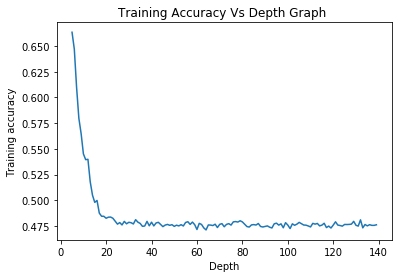

In [409]:
plt.plot(depth,training_score)
    
plt.xlabel('Depth') 
plt.ylabel('Training accuracy') 
plt.title(f'Training Accuracy Vs Depth Graph ') 

Text(0.5,1,'Testing Accuracy Vs Depth Graph')

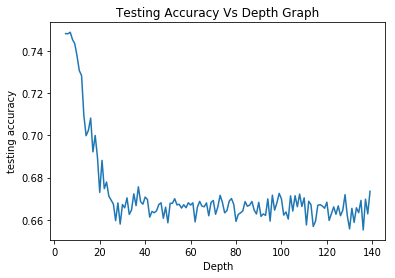

In [410]:
plt.plot(depth,testing_score)
    
plt.xlabel('Depth') 
plt.ylabel('testing accuracy') 
plt.title(f'Testing Accuracy Vs Depth Graph') 

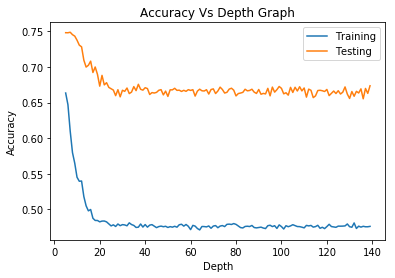

In [411]:
plt.plot(depth,training_score, label="Training")   
plt.plot(depth,testing_score, label="Testing") 
  
plt.xlabel('Depth') 
plt.ylabel('Accuracy') 
plt.title('Accuracy Vs Depth Graph') 
plt.legend() 
plt.show() 

In [417]:
d=testing_score.index(max(testing_score))
depth[d]

7

OPTIMAL DECISION TREE DEPTH = 7